In [1]:
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import random

In [2]:
csvs = sorted(glob.glob('/workspace/jay/DDP/Ocelot/ocelot2023/annotations/train/cell/*.csv'))
imgs = sorted(glob.glob('/workspace/jay/DDP/Ocelot/ocelot2023/images/train/cell/*.jpg'))
masks = sorted(glob.glob('/workspace/jay/DDP/Ocelot/ocelot2023/cell_seg_masks/*.npy'))
assert(len(csvs)==len(imgs))
assert(len(csvs)==len(masks))

In [3]:
# for i in tqdm(range(len(csvs))):   #creating masks for original cell patches
#     try:
#         annot = pd.read_csv(csvs[i],header=None)
#         name = csvs[i].split('/')[-1][:-4]
#         gt = np.zeros((3,1024,1024))
#         for j in range(len(annot)):
#             x,y,clas = annot.loc[j][0], annot.loc[j][1], annot.loc[j][2]
#             Y, X = np.ogrid[:1024, :1024]
#             dist_from_center = np.sqrt((X - x)**2 + (Y-y)**2)
#             mask = dist_from_center <= 15
#             if clas==1:
#                 gt[0][mask] = 1
#             else:
#                 gt[1][mask] = 1
#         gt[2][np.where(gt[0]!=1) and np.where(gt[1]!=1)]  = 1
#         np.save(f'/workspace/jay/DDP/Ocelot/ocelot2023/cell_seg_masks/{name}.npy', gt)
#     except: 
#         name = csvs[i].split('/')[-1][:-4]
#         gt = np.zeros((3,1024,1024))
#         gt[2] = 1
#         np.save(f'/workspace/jay/DDP/Ocelot/ocelot2023/cell_seg_masks/{name}.npy', gt)

In [4]:
for i in tqdm(range(1,len(csvs))):   #creating masks for original cell patches
    try:
        annot = pd.read_csv(csvs[i],header=None)
        name = csvs[i].split('/')[-1][:-4]
        image = np.array(Image.open(imgs[i]))
        gt = np.moveaxis(np.load(masks[i]),0,-1)
        for j in (range(len(annot))):
            y,x,clas = annot.loc[j][0], annot.loc[j][1], annot.loc[j][2]     
            left,right = max(0,x-64), min(1024,x+64)
            top,bottom = max(0,y-64), min(1024,y+64)
            patch = image[left:right,top:bottom,:]
            mask = gt[left:right,top:bottom,:]
            mask = np.moveaxis(mask,-1,0)
            if patch.shape==(128,128,3):
                patch = Image.fromarray(patch)
                patch.save(f'/workspace/jay/DDP/Ocelot/cell_patches/patches/{clas-1}_{name}_{j}.png')
                np.save(f'/workspace/jay/DDP/Ocelot/cell_patches/gt_masks/{clas-1}_{name}_{j}.npy', mask)
    except: 
        image = np.array(Image.open(imgs[i]))
        gt = np.moveaxis(np.load(masks[i]),0,-1)
        for k in range(64):
            x,y = random.randint(65,949),random.randint(65,949)
            patch = image[x-64:x+64,y-64:y+64,:]
            patch = Image.fromarray(patch)
            mask = gt[x-64:x+64,y-64:y+64,:]
            mask = np.moveaxis(mask,-1,0)
            patch.save(f'/workspace/jay/DDP/Ocelot/cell_patches/patches/2_{name}_{k}.png')
            np.save(f'/workspace/jay/DDP/Ocelot/cell_patches/gt_masks/2_{name}_{k}.npy', mask)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 399/399 [05:54<00:00,  1.13it/s]


In [5]:
patch.shape

(87, 96, 3)

In [6]:
files = glob.glob('/workspace/jay/DDP/Ocelot/cell_patches/patches/*.png')
print(len(files))

50098


In [65]:
x

916

In [22]:
i=1
annot = pd.read_csv(csvs[i],header=None)
name = csvs[i].split('/')[-1][:-4]
image = np.array(Image.open(imgs[i]))
mask = np.load(masks[i])

In [23]:
j=10
y,x,clas = annot.loc[j][0], annot.loc[j][1], annot.loc[j][2]  

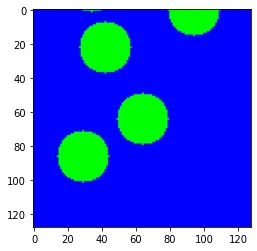

In [24]:
plt.imshow(np.moveaxis(mask,0,-1)[x-64:x+64,y-64:y+64,:])

In [25]:
mask = np.moveaxis(mask,0,-1)

In [26]:
n = np.moveaxis(mask,-1,0)

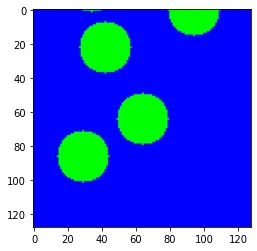

In [28]:
plt.imshow(np.moveaxis(n,0,-1)[x-64:x+64,y-64:y+64,:])

In [21]:
n.shape

AttributeError: 'tuple' object has no attribute 'shape'